# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.301619e+01     1.590365e+01
 * time: 0.0047681331634521484
     1     6.237171e+01     1.089591e+01
 * time: 0.01388406753540039
     2     5.520305e+01     1.639605e+01
 * time: 0.03518795967102051
     3     4.009610e+01     1.187951e+01
 * time: 0.06433606147766113
     4     2.998808e+01     9.447753e+00
 * time: 0.09479904174804688
     5     2.546284e+01     8.157037e+00
 * time: 0.20190811157226562
     6     1.209187e+01     2.325870e+00
 * time: 0.22673392295837402
     7     1.138553e+01     5.880529e+00
 * time: 0.2437300682067871
     8     9.776729e+00     2.716860e+00
 * time: 0.2644519805908203
     9     9.608477e+00     6.459364e+00
 * time: 0.28159213066101074
    10     9.410469e+00     4.670722e+00
 * time: 0.300368070602417
    11     8.443122e+00     2.446965e+00
 * time: 0.32200098037719727
    12     7.982425e+00     4.266952e+00
 * time: 0.3393869400024414
    13     7.575032e+00     3.201025e+00
 * time: 0.

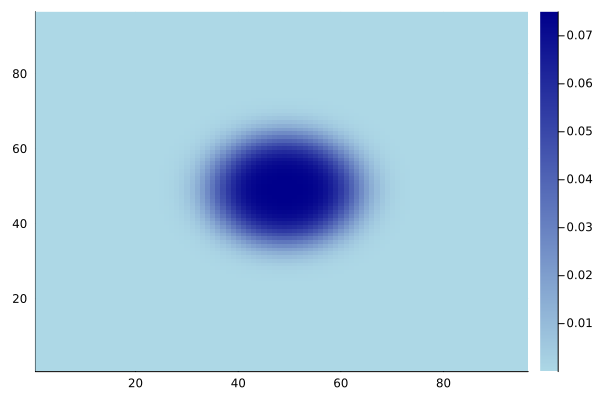

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)